  ##                               Handwritten digits classification using neural network:


In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves



#### Importing all the modules that we will be using on this code:

In [176]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the digits data from keras: 

In [145]:
(X_train, y_train) ,(X_test, y_test) = keras.datasets.mnist.load_data()

#### Let's check how many samples do we have in our digits data set in the X_train and X_test :

In [146]:
len(X_train)

60000

In [147]:
len(X_test)

10000

#### If you look into the size of one image in the digits data set, it's 28x28 pixels and it's exactly an array of two dimension:

In [148]:
X_train[0].shape

(28, 28)

In [149]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### To visualize the first digit image:

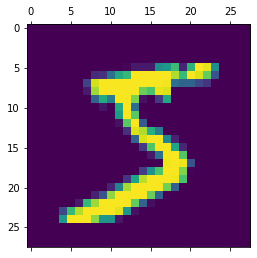

In [150]:
plt.matshow(X_train[0])

In [151]:
y_train[0]

5

#### Our y_train there's no need to flattenet it because it's already one single array:

In [152]:
y_train.shape

(60000,)

#### Flatten our training data set to one single dimensional array of 784 = 28*28:

In [153]:
X_train_Flattened = X_train.reshape(len(X_train), 28*28)
X_test_Flattened = X_test.reshape(len(X_test), 28*28)

In [154]:
X_train_Flattened.shape

(60000, 784)

In [155]:
X_test_Flattened.shape

(10000, 784)

#### Now we need to create our model of neural network:

In [156]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation='sigmoid')])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.fit(X_train_Flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7007 - accuracy: 0.8413
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 6.2187 - accuracy: 0.8769
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6926 - accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 5.5716 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 5.1898 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3150 - accuracy: 0.8875
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3567 - accuracy: 0.8884
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3236 - accuracy: 0.8878
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2131 - accuracy: 0.8894
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.134

In [157]:
model.evaluate(X_test_Flattened, y_test)

313/313 [==============================] - 1s 952us/step - loss: 6.6896 - accuracy: 0.8775


[6.689614295959473, 0.8774999976158142]

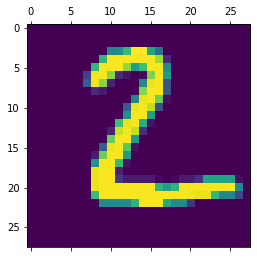

In [158]:
plt.matshow(X_test[1])

In [159]:
y_predicted = model.predict(X_test_Flattened)
y_predicted[1]

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [160]:
np.argmax(y_predicted[1])

0

In [165]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 0]

In [166]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [168]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    1,    1,    0,    0,    0,    0],
       [   5, 1128,    1,    1,    0,    0,    0,    0,    0,    0],
       [ 377,  270,  365,    9,    5,    1,    2,    1,    2,    0],
       [ 264,  155,  196,  394,    0,    0,    0,    0,    1,    0],
       [ 167,   16,   37,  106,  652,    1,    0,    0,    3,    0],
       [ 348,   24,   65,  248,   41,  162,    2,    0,    1,    1],
       [ 281,   13,  331,   30,  125,   51,  125,    0,    2,    0],
       [ 112,   54,   68,  683,   39,   16,    0,   51,    3,    2],
       [ 138,  156,  131,  288,   35,  116,    4,   13,   92,    1],
       [  56,   37,   25,  469,  348,    9,    1,   53,    2,    9]])>

#### Visaulize the confusion matrix:

Text(69.0, 0.5, 'Truth')

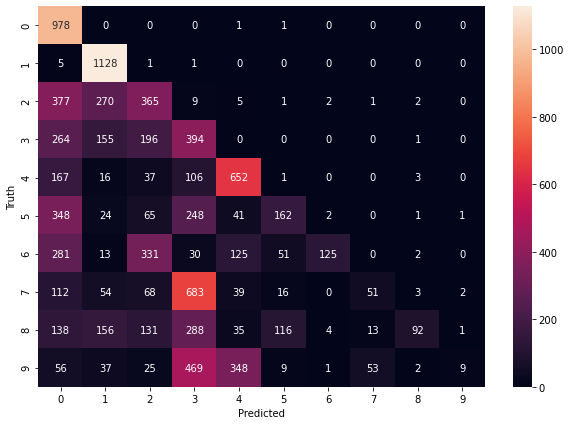

In [171]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### In order to improve the perfromance of our model we will add a hidden layer to our model:

#### when you have a hidden layer, your model will take more time to train:

In [178]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.fit(X_train_Flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.3907 - accuracy: 0.8310
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3981 - accuracy: 0.9011
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3017 - accuracy: 0.9216
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2651 - accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2411 - accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2293 - accuracy: 0.9402
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2162 - accuracy: 0.9445
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2070 - accuracy: 0.9464
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1970 - accuracy: 0.9488
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.194

In [179]:
model.evaluate(X_test_Flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2632 - accuracy: 0.9450


[0.26317259669303894, 0.9449999928474426]

#### Flatten with keras:

In [184]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6216 - accuracy: 0.9068
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3494 - accuracy: 0.9370
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2999 - accuracy: 0.9416
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2911 - accuracy: 0.9454
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2425 - accuracy: 0.9512
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2324 - accuracy: 0.9536
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2147 - accuracy: 0.9580
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2083 - accuracy: 0.9573
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1891 - accuracy: 0.9608
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l